CODE BLOCK: 1

In [1]:
import sys
#Check the working mode
'google.colab' in sys.modules

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
if 'google.colab' in sys.modules:
# Add the directory containing your module to the Python path
  module_path = '/content/drive/MyDrive/Colab_Notebooks/Session6'
  sys.path.append(module_path)
  print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/Colab_Notebooks/Session6']


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
# if 'google.colab' in sys.modules:
#     # Download the repo from GitHub
#     print("Downloading repository on Colab...")
#     !git clone https://github.com/Shivdutta/ERA2-Session6.git

#     # Import files from the downloaded repository
#     #sys.path.insert(0,'./ERA/Session/')

CODE BLOCK: 2

In [6]:
# Check if GPU is available
# Set device as GPU if available else CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? True


In [7]:
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/utils.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/dataset.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/model.py

CODE BLOCK: 3

In [8]:
from model import Net
#dropout_prob=0.069

In [9]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3104,))
    ])

CODE BLOCK: 4 & 5 merged

In [10]:
from dataset import get_train_loader, get_test_loader
dir(get_train_loader)
#torch.manual_seed(1)

#kwargs = {'batch_size': 256, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
kwargs = {'batch_size': 128, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
print(kwargs)

train_loader = get_train_loader(**kwargs)
test_loader = get_test_loader(**kwargs)

{'batch_size': 128, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


CODE BLOCK: 6

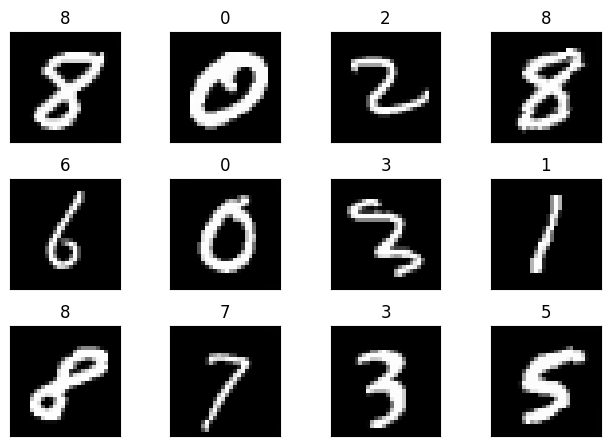

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [12]:
from utils import plot_accuracy, get_summary
dropout_prob = 0.01
get_summary(Net(dropout_prob), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              36
              ReLU-2            [-1, 4, 28, 28]               0
       BatchNorm2d-3            [-1, 4, 28, 28]               8
            Conv2d-4            [-1, 4, 28, 28]             144
              ReLU-5            [-1, 4, 28, 28]               0
       BatchNorm2d-6            [-1, 4, 28, 28]               8
            Conv2d-7            [-1, 4, 28, 28]             144
              ReLU-8            [-1, 4, 28, 28]               0
       BatchNorm2d-9            [-1, 4, 28, 28]               8
        Dropout2d-10            [-1, 4, 28, 28]               0
        MaxPool2d-11            [-1, 4, 14, 14]               0
           Conv2d-12            [-1, 8, 14, 14]             288
             ReLU-13            [-1, 8, 14, 14]               0
      BatchNorm2d-14            [-1, 8,

CODE BLOCK: 8

In [13]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [14]:
from utils import train_model, test_model

CODE BLOCK: 10

In [15]:
from torch.optim.lr_scheduler import StepLR

# model =  Net(dropout_prob=0.069).to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model = Net(dropout_prob=dropout_prob).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = train_model(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test_losses, test_acc = test_model(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.09455584734678268 Batch_id=468 Accuracy=84.33: 100%|██████████| 469/469 [00:12<00:00, 38.05it/s]



Test set: Average loss: 0.0800, Accuracy: 9763/10000 (97.63%)

Currently Executing Epoch: 2


Loss=0.047093357890844345 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:11<00:00, 40.91it/s]



Test set: Average loss: 0.0440, Accuracy: 9870/10000 (98.70%)

Currently Executing Epoch: 3


Loss=0.07954557985067368 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:11<00:00, 40.87it/s]



Test set: Average loss: 0.0357, Accuracy: 9892/10000 (98.92%)

Currently Executing Epoch: 4


Loss=0.04653935506939888 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:11<00:00, 40.04it/s]



Test set: Average loss: 0.0323, Accuracy: 9895/10000 (98.95%)

Currently Executing Epoch: 5


Loss=0.1006665751338005 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:11<00:00, 40.81it/s]



Test set: Average loss: 0.0295, Accuracy: 9907/10000 (99.07%)

Currently Executing Epoch: 6


Loss=0.010447929613292217 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:11<00:00, 40.70it/s]



Test set: Average loss: 0.0292, Accuracy: 9905/10000 (99.05%)

Currently Executing Epoch: 7


Loss=0.005289018154144287 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:11<00:00, 39.99it/s]



Test set: Average loss: 0.0281, Accuracy: 9907/10000 (99.07%)

Currently Executing Epoch: 8


Loss=0.06044416502118111 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 40.43it/s]



Test set: Average loss: 0.0269, Accuracy: 9917/10000 (99.17%)

Currently Executing Epoch: 9


Loss=0.0073290481232106686 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:11<00:00, 40.64it/s]



Test set: Average loss: 0.0272, Accuracy: 9908/10000 (99.08%)

Currently Executing Epoch: 10


Loss=0.027997151017189026 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 40.98it/s]



Test set: Average loss: 0.0235, Accuracy: 9921/10000 (99.21%)

Currently Executing Epoch: 11


Loss=0.006519762799143791 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:11<00:00, 40.74it/s]



Test set: Average loss: 0.0239, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 12


Loss=0.01648343726992607 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 40.30it/s]



Test set: Average loss: 0.0247, Accuracy: 9919/10000 (99.19%)

Currently Executing Epoch: 13


Loss=0.03205646947026253 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:11<00:00, 40.80it/s]



Test set: Average loss: 0.0224, Accuracy: 9927/10000 (99.27%)

Currently Executing Epoch: 14


Loss=0.005941060837358236 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:11<00:00, 40.30it/s]



Test set: Average loss: 0.0187, Accuracy: 9941/10000 (99.41%)

Currently Executing Epoch: 15


Loss=0.0144359664991498 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:11<00:00, 40.72it/s]



Test set: Average loss: 0.0223, Accuracy: 9928/10000 (99.28%)

Currently Executing Epoch: 16


Loss=0.008336295373737812 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:11<00:00, 40.73it/s]



Test set: Average loss: 0.0180, Accuracy: 9944/10000 (99.44%)

Currently Executing Epoch: 17


Loss=0.01875130645930767 Batch_id=468 Accuracy=99.60: 100%|██████████| 469/469 [00:11<00:00, 40.89it/s]



Test set: Average loss: 0.0174, Accuracy: 9945/10000 (99.45%)

Currently Executing Epoch: 18


Loss=0.047649770975112915 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:11<00:00, 41.74it/s]



Test set: Average loss: 0.0171, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 19


Loss=0.00302311428822577 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:11<00:00, 40.23it/s]



Test set: Average loss: 0.0172, Accuracy: 9946/10000 (99.46%)



In [16]:
from utils import plot_loss,plot_accuracy


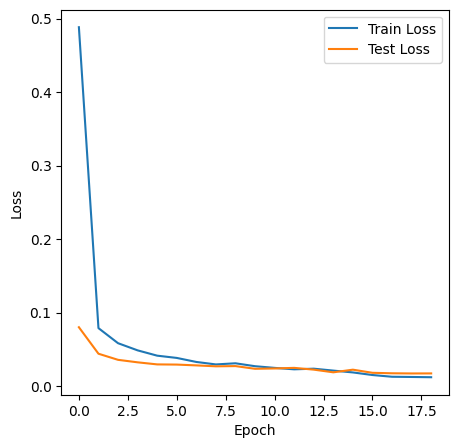

In [17]:
plot_loss(train_losses, test_losses)

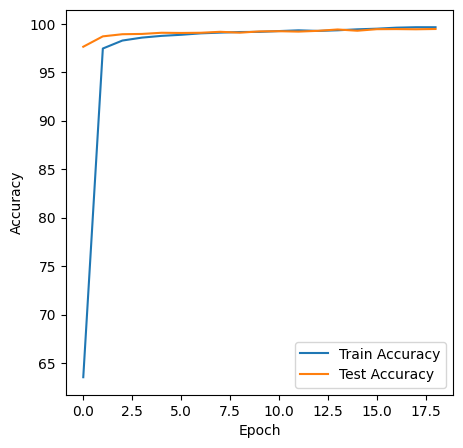

In [18]:
plot_accuracy(train_acc, test_acc)

CODE BLOCK: 11

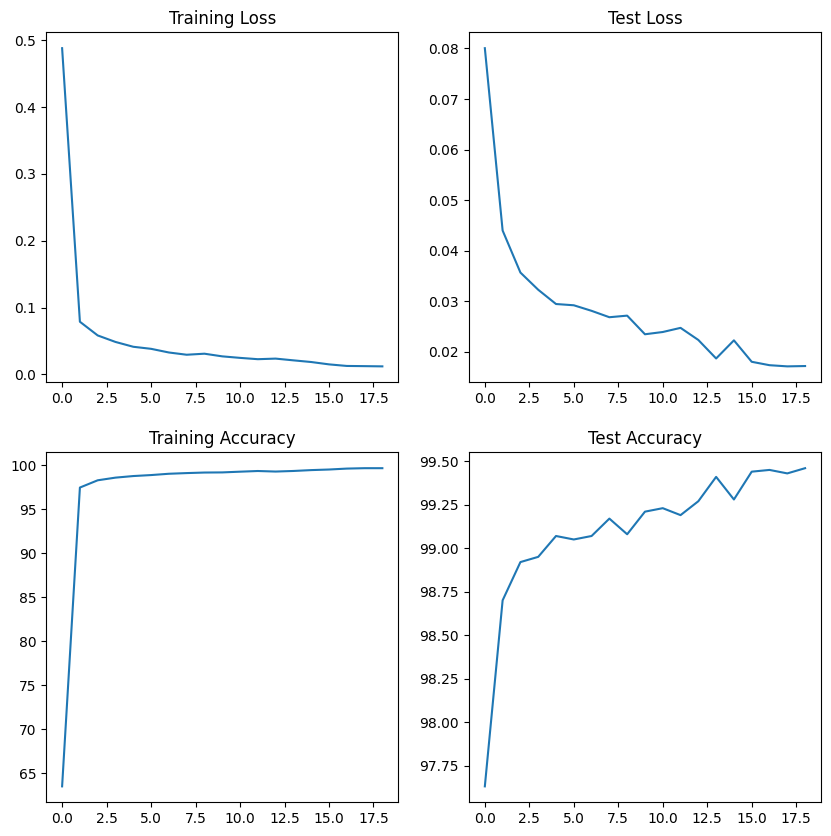

In [19]:
# Print loss and accuracy
from utils import display_loss_and_accuracies
display_loss_and_accuracies(train_losses, train_acc, test_losses, test_acc)